<h1>DETERMINING AIR QUALITY INDEX (AQI) IN DELHI </h1>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_data=pd.read_csv('delhiaqi.csv')
df_breakpoints=pd.read_csv('standardaqi.csv')
df_condition=pd.read_csv('Health Conditions.csv')

In [32]:
df_data['date']=pd.to_datetime(df_data['date'])
df_data.head()

,date,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [33]:
df_condition.head()

,AQI_LowerBound,AQI_HigherBound,Category,Health Conditions
0,0,50,Good,Air quality is satisfactory and poses no risk.
1,51,100,Satisfactory,Acceptable air quality; minor breathing discom...
2,101,200,Moderate,May cause breathing discomfort to people with ...
3,201,300,Poor,"May cause breathing discomfort for everyone, e..."
4,301,400,Very Poor,May cause respiratory illness in prolonged exp...


In [34]:
df_breakpoints.head()

,Gas_type,C_low,C_high,AQI_low,AQI_high
0,CO,0,1000,0,50
1,CO,1001,2000,51,100
2,CO,2001,10000,101,200
3,CO,10001,17000,201,300
4,CO,17001,34000,301,400


In [35]:
def aqi_calculation(pollutant,concentration):
    pollutant_data=df_breakpoints[df_breakpoints["Gas_type"]==pollutant]
    extream_values={'CO':50000,'NO':400,'NO2':400,'O3':748,'SO2':1600,'PM2.5':250,'PM10':430,'NH3':1800}
    if concentration>extream_values[pollutant]:
        return 500
    mr=pollutant_data[(pollutant_data['C_low'] <= concentration) & 
                        (pollutant_data['C_high'] >= concentration)]
    if mr.empty:
        concentration=round(concentration)
        mr=pollutant_data[(pollutant_data['C_low'] <= concentration) & 
                        (pollutant_data['C_high'] >= concentration)]
    row=mr.iloc[0]
    C_low,C_high=row["C_low"],row["C_high"]
    I_low,I_high=row["AQI_low"],row["AQI_high"]
    AQI=((I_high - I_low)/(C_high - C_low))*(concentration-C_low) + I_low
    return round(AQI)

In [36]:
pollutants=['CO','NO','NO2','O3','SO2','PM2.5','PM10','NH3']
for pollutant in pollutants:
    df_data[f"AQI_{pollutant}"]=df_data[pollutant].apply(lambda x:aqi_calculation(pollutant,x))
df_data

,date,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,AQI_CO,AQI_NO,AQI_NO2,AQI_O3,AQI_SO2,AQI_PM2.5,AQI_PM10,AQI_NH3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,83,2,49,6,22,338,163,1
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,94,9,52,2,28,348,174,2
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,107,35,55,0,38,377,211,3
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,115,69,55,1,45,500,254,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,119,86,56,5,49,500,273,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,88,6,46,33,38,386,240,2
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,87,9,44,46,43,381,231,2
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,96,10,50,57,54,394,246,3
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,69,11,66,72,107,335,161,2


In [37]:
df_data["Overall_AQI"]=df_data[[f"AQI_{p}"for p in pollutants]].max(axis=1)
df_data[['date']+[f"AQI_{p}"for p in pollutants]+["Overall_AQI"]]

,date,AQI_CO,AQI_NO,AQI_NO2,AQI_O3,AQI_SO2,AQI_PM2.5,AQI_PM10,AQI_NH3,Overall_AQI
0,2023-01-01 00:00:00,83,2,49,6,22,338,163,1,338
1,2023-01-01 01:00:00,94,9,52,2,28,348,174,2,348
2,2023-01-01 02:00:00,107,35,55,0,38,377,211,3,377
3,2023-01-01 03:00:00,115,69,55,1,45,500,254,3,500
4,2023-01-01 04:00:00,119,86,56,5,49,500,273,4,500
...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,88,6,46,33,38,386,240,2,386
557,2023-01-24 05:00:00,87,9,44,46,43,381,231,2,381
558,2023-01-24 06:00:00,96,10,50,57,54,394,246,3,394
559,2023-01-24 07:00:00,69,11,66,72,107,335,161,2,335


In [38]:
AQI_bins=[0,50,100,200,300,400,500]
AQI_label1=df_condition['Category'].tolist()
AQI_label2=df_condition['Health Conditions'].tolist()

In [39]:
AQI_label1

['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

In [40]:
AQI_label2

['Air quality is satisfactory and poses no risk.',
 'Acceptable air quality; minor breathing discomfort for sensitive people.',
 'May cause breathing discomfort to people with lung issues (e.g., asthma).',
 'May cause breathing discomfort for everyone, especially children & elderly.',
 'May cause respiratory illness in prolonged exposure.',
 'Serious health effects; affects even healthy people.']

In [41]:
df_data['Category']=pd.cut(df_data['Overall_AQI'],bins=AQI_bins,labels=AQI_label1,right=True)

In [42]:
df_data.head()

,date,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,AQI_CO,AQI_NO,AQI_NO2,AQI_O3,AQI_SO2,AQI_PM2.5,AQI_PM10,AQI_NH3,Overall_AQI,Category
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,83,2,49,6,22,338,163,1,338,Very Poor
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,94,9,52,2,28,348,174,2,348,Very Poor
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,107,35,55,0,38,377,211,3,377,Very Poor
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,115,69,55,1,45,500,254,3,500,Severe
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,119,86,56,5,49,500,273,4,500,Severe


In [43]:
df_data["Health Condition"]=pd.cut(df_data["Overall_AQI"],bins=AQI_bins,labels=AQI_label2,right=True)

In [44]:
df_data.head()

,date,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,AQI_CO,AQI_NO,AQI_NO2,AQI_O3,AQI_SO2,AQI_PM2.5,AQI_PM10,AQI_NH3,Overall_AQI,Category,Health Condition
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,83,2,49,6,22,338,163,1,338,Very Poor,May cause respiratory illness in prolonged exp...
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,94,9,52,2,28,348,174,2,348,Very Poor,May cause respiratory illness in prolonged exp...
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,107,35,55,0,38,377,211,3,377,Very Poor,May cause respiratory illness in prolonged exp...
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,115,69,55,1,45,500,254,3,500,Severe,Serious health effects; affects even healthy p...
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,119,86,56,5,49,500,273,4,500,Severe,Serious health effects; affects even healthy p...


<h1>ANALYSIS OF AQI IN DELHI</h1>

In [45]:
category_count=df_data["Category"].value_counts().sort_index()

In [46]:
category_count

Category
Good              0
Satisfactory      0
Moderate          7
Poor             14
Very Poor       183
Severe          357
Name: count, dtype: int64

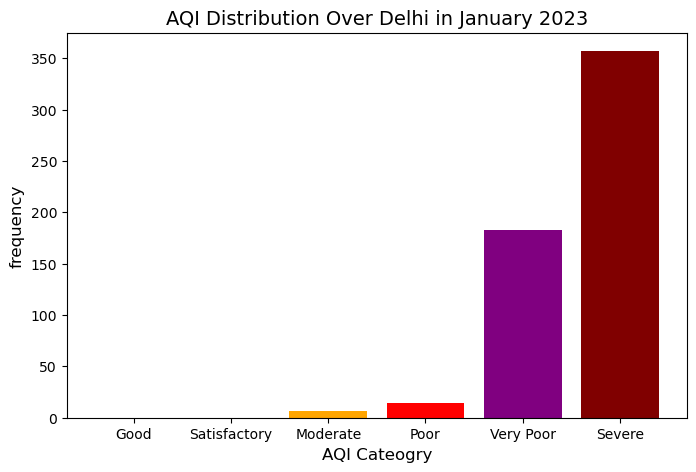

In [47]:
plt.figure(figsize=(8,5))
plt.bar(category_count.index,category_count.values,color=["green", "yellow", "orange", "red", "purple", "maroon", "black"])
plt.xlabel('AQI Cateogry',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.title('AQI Distribution Over Delhi in January 2023',fontsize=14)
plt.show()

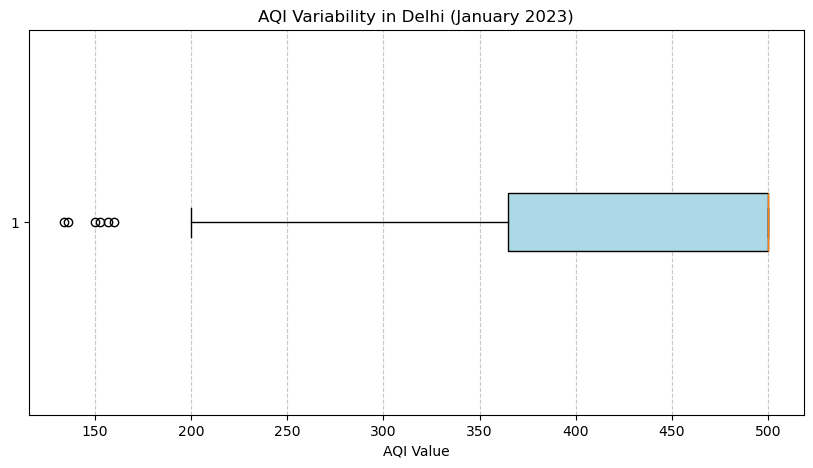

In [48]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_data["Overall_AQI"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("AQI Value")
plt.title("AQI Variability in Delhi (January 2023)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

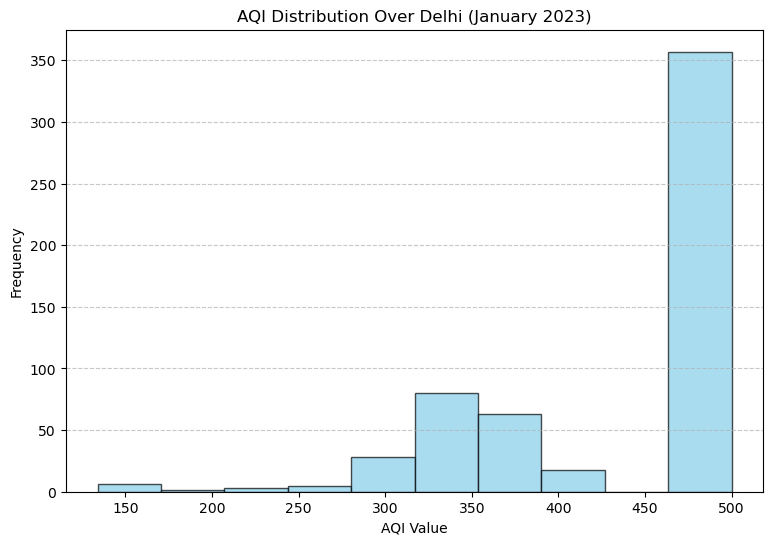

In [53]:
plt.figure(figsize=(9, 6))
plt.hist(df_data["Overall_AQI"], bins=10, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title("AQI Distribution Over Delhi (January 2023)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

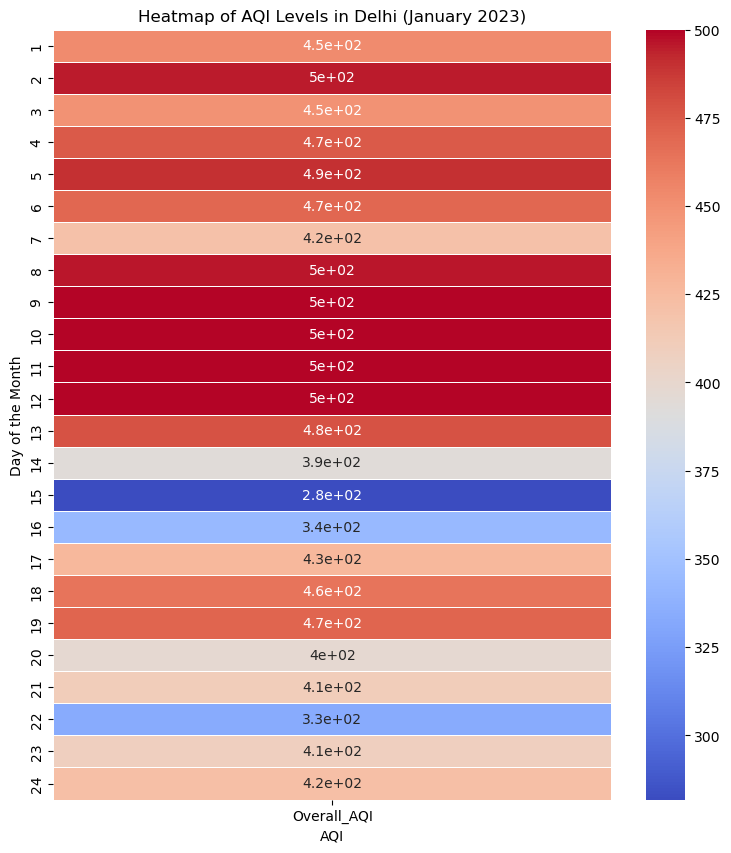

In [52]:
df_data["Day"] = df_data["date"].dt.day
pivot_data = df_data.pivot_table(index="Day", values="Overall_AQI", aggfunc="mean")

plt.figure(figsize=(9, 10))
sns.heatmap(pivot_data, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Heatmap of AQI Levels in Delhi (January 2023)")
plt.xlabel("AQI")
plt.ylabel("Day of the Month")
plt.show()

<h2>Conclusion:</h2>
<h4>AQI Distribution Over Delhi (Jan 2023)</h4>
<p>Our analysis shows that Delhi’s air quality in January 2023 was predominantly Moderate to Poor, with several Severe days posing serious health risks. Spikes in AQI indicate the influence of emissions, weather, and urban activity.
</p>
<h3>Key Takeaways:</h3>
<ul>
    <li>Most days had unhealthy air quality.</li>
    <li>AQI spikes highlight pollution hotspots.</li>
    <li>Urgent need for stricter pollution control & public awareness.</li>
</ul>
<b>Improving air quality requires policy action, sustainable practices, and community efforts to ensure cleaner air for all.</b>